In [1]:
import pandas as pd
df=pd.read_csv("/Users/anishjain/Downloads/AQI_Clean_Data.csv")
df.head()

,State,City,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI,AQI Type
0,Andaman and Nicobar Islands,Port Blair,12.0,20.0,6.0,3.0,215.333333,7.0,89.0,28.0,20.0,Good
1,Andhra Pradesh,Vinukonda,36.0,53.0,27.0,14.0,451.000000,22.0,68.0,28.0,59.0,Satisfactory
2,Andhra Pradesh,Darsi,35.0,53.0,24.0,8.0,308.000000,26.0,69.0,28.0,58.0,Satisfactory
3,Andhra Pradesh,Govindapuram,36.0,55.0,22.0,10.0,321.000000,19.0,68.0,28.0,60.0,Satisfactory
4,Andhra Pradesh,Pedda Nakkala Palem,37.0,58.0,23.0,8.0,306.000000,23.0,67.0,29.0,61.0,Satisfactory


In [2]:
print(df.tail())
print(df.shape)
print(df.isnull().sum())


              State                City  PM2.5  PM10    O3  SO2     CO  \
398  West Medinipur              Kharar   58.0  83.0   3.0  3.0  103.0   
399     West Bengal           Bardhaman   53.0  76.0   2.0  1.0   89.0   
400     West Bengal          Patrasayer   53.0  76.0   2.0  1.0   89.0   
401     West Bengal  Talchinan-Sanihati   21.0  41.0  27.0  9.0  965.0   
402     West Bengal              Bagnan   21.0  41.0  27.0  9.0  965.0   

     Wind Speed  Humidity  Temp   AQI      AQI Type  
398        11.0      94.0  26.0  97.0  Satisfactory  
399        14.0      84.0  28.0  89.0  Satisfactory  
400         8.0      91.0  27.0  89.0  Satisfactory  
401        14.0      84.0  28.0  49.0          Good  
402        12.0      85.0  28.0  49.0          Good  
(403, 12)
State         0
City          0
PM2.5         0
PM10          0
O3            0
SO2           0
CO            0
Wind Speed    0
Humidity      0
Temp          0
AQI           0
AQI Type      0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select Features (PM2.5, PM10, NO2, CO, etc.)
X = df[['PM2.5', 'PM10', 'CO', 'SO2', 'O3','Wind Speed','Humidity','Temp']]  # Adjust based on actual columns
y = df['AQI']  # Target Variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1.88


In [6]:
y_pred

array([ 75.  ,  94.8 ,  94.95,  35.22,  62.14,  75.  ,  47.11,  96.1 ,
        48.9 ,  69.16,  42.04,  74.48,  94.95,  55.47,  69.87,  39.4 ,
        55.74,  27.  ,  61.08,  37.93,  71.53,  96.1 ,  43.12,  27.  ,
        40.6 ,  59.  ,  75.  ,  69.96,  36.02,  37.83, 209.88,  85.71,
        23.16, 209.88,  27.05,  60.15,  47.64,  37.16,  75.  , 114.16,
        50.46,  65.93,  89.38,  48.76,  68.38,  37.11,  35.92,  65.35,
        44.64,  69.82,  47.37,  38.03,  48.92,  39.4 ,  84.33,  48.31,
        75.  , 209.67,  62.08,  40.04,  72.47,  40.  ,  27.06,  69.99,
        37.93,  76.18,  87.97,  58.07,  27.  ,  28.32,  59.87,  50.2 ,
        88.04,  47.8 ,  85.85,  61.06,  62.08,  74.48,  42.04,  44.95,
        91.4 ])

/var/folders/pj/bb0blhm15x7dw5v23gt3sxvc0000gn/T/ipykernel_6604/2363484547.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['timestamp'] = pd.date_range(start='2024-03-01', periods=len(df), freq='H')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


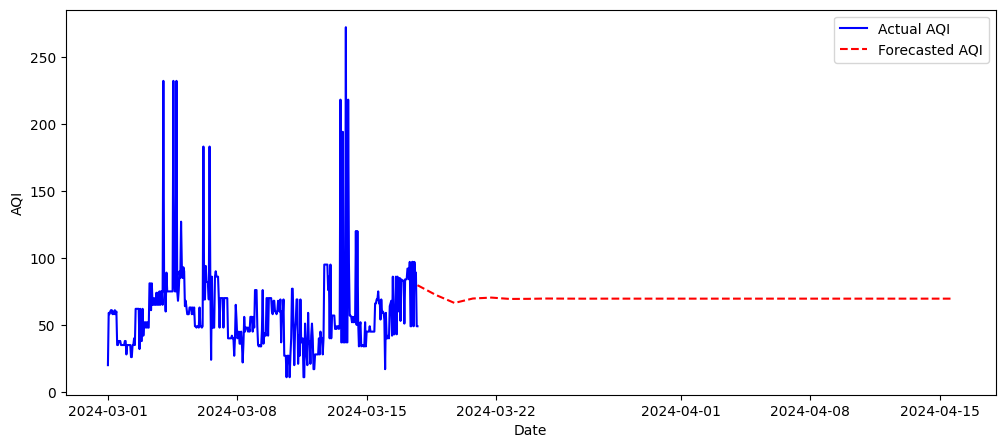

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert Date column to datetime format
df['timestamp'] = pd.date_range(start='2024-03-01', periods=len(df), freq='H')

# Set timestamp as the index
df.set_index('timestamp', inplace=True)

# Fit ARIMA Model
model = ARIMA(df['AQI'], order=(2, 1, 2))  # Adjust p, d, q based on ACF/PACF
model_fit = model.fit()

# Forecast Next 30 Days
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['AQI'], label="Actual AQI", color='blue')
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast, linestyle="dashed", color='red', label="Forecasted AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()
#mae = mean_absolute_error(y_test, forecast)


In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get actual and predicted values
actual = df["AQI"].iloc[-30:]  # Last 30 days of actual data
predicted = model_fit.forecast(steps=30)

# Calculate error metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 18.30
Mean Squared Error (MSE): 361.70
Root Mean Squared Error (RMSE): 19.02
